📌 Extracción


In [2]:
import pandas as pd

In [3]:
url = "/content/datos_tratados.csv"
datos = pd.read_csv(url)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


📌 Eliminación de Columnas Irrelevantes

In [5]:
datos = datos.drop(columns='customerID',axis=1)


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


📌 Encoding categoricas

In [7]:
categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [8]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)


In [9]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7267 non-null   int64  
 1   SeniorCitizen                            7267 non-null   int64  
 2   Partner                                  7267 non-null   int64  
 3   Dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   PhoneService                             7267 non-null   int64  
 6   MultipleLines                            7267 non-null   int64  
 7   OnlineSecurity                           7267 non-null   int64  
 8   OnlineBackup                             7267 non-null   int64  
 9   DeviceProtection                         7267 non-null   int64  
 10  TechSupport                              7267 no

# 📌 Verificación de la Proporción de Cancelación (Churn)

In [10]:
datos.Churn.value_counts()

,count
Churn,
0,5398
1,1869


📌 Análisis de Correlación

In [11]:
datos[['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling',
       'Charges.Monthly', 'Charges.Total', 'Cuentas.diarias']].corr()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas.diarias
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586,0.186666,0.189866,-0.193345,0.189918
SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.157734,0.220388,0.104076,0.220360
Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,-0.011201,0.097122,0.315409,0.097180
Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.111752,-0.115832,0.061474,-0.115879
tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.007949,0.247982,0.825407,0.247992
PhoneService,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.013624,0.246709,0.113985,0.246668
MultipleLines,0.039343,0.144567,0.141187,-0.027894,0.331678,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.163225,0.490699,0.468405,0.490712
OnlineSecurity,-0.166828,-0.037953,0.141392,0.083951,0.327252,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881,-0.001693,0.298307,0.412764,0.298303
OnlineBackup,-0.080163,0.068824,0.139523,0.023686,0.361291,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788,0.131187,0.442974,0.512027,0.442954
DeviceProtection,-0.063452,0.060358,0.153209,0.014797,0.361792,-0.073033,0.202172,0.275699,0.306665,1.000000,0.332267,0.394421,0.402720,0.105211,0.483590,0.523836,0.483549


📌 Análisis Dirigido

Text(0.5, 1.0, 'Duración vs Churn')

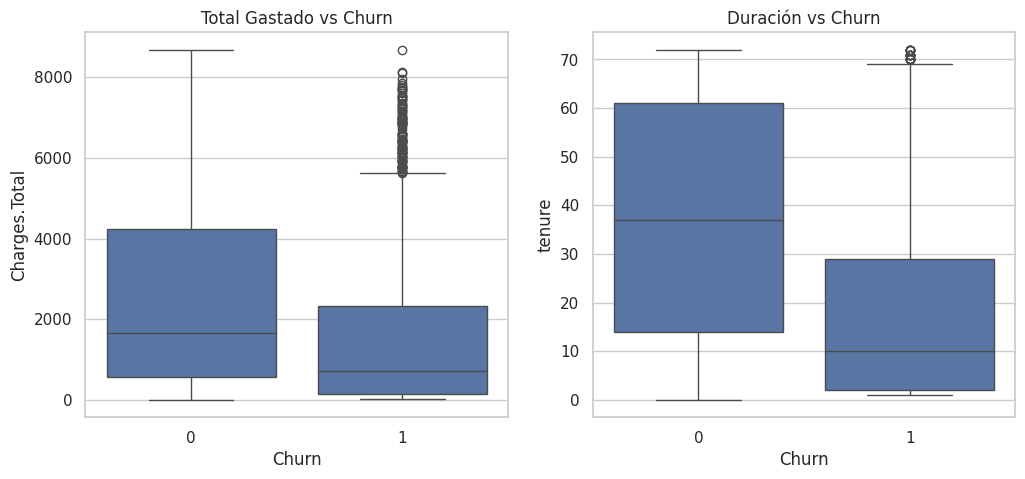

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

# Total gastado
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=datos)
plt.title('Total Gastado vs Churn')

# Duración
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Duración vs Churn')

📌 Separación de Datos

In [13]:
X = datos_codificados.drop(['Churn'],axis=1)
y = datos_codificados['Churn']

In [147]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7267 non-null   int64  
 1   Partner                                  7267 non-null   int64  
 2   Dependents                               7267 non-null   int64  
 3   tenure                                   7267 non-null   int64  
 4   PhoneService                             7267 non-null   int64  
 5   MultipleLines                            7267 non-null   int64  
 6   OnlineSecurity                           7267 non-null   int64  
 7   OnlineBackup                             7267 non-null   int64  
 8   DeviceProtection                         7267 non-null   int64  
 9   TechSupport                              7267 non-null   int64  
 10  StreamingTV                              7267 no

In [14]:
y.value_counts()

,count
Churn,
0,5398
1,1869


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor

In [16]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

📌 Creación de Modelos

In [17]:
modelo1 = DecisionTreeClassifier(max_depth=5)
modelo1.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo1.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo1.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8041426324069219
La exactitud del modelo con el conjunto de validación es de: 0.8073899371069182


In [18]:
modelo2 = RandomForestRegressor(max_depth=5)
modelo2.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo2.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo2.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.3364848878471388
La exactitud del modelo con el conjunto de validación es de: 0.3249517863704141


📌 Evaluación de los Modelos

In [19]:
y_previsto = modelo1.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[897  48]
 [197 130]]


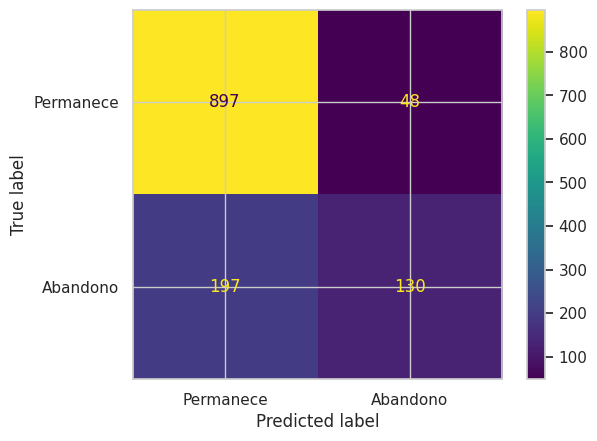

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Permanece','Abandono'])
visualizacion.plot();

In [21]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.7303370786516854
La sensibilidad (Recall) del modelo es: 0.39755351681957185
La exactitud (accuracy) del modelo es: 0.8073899371069182
El F1-score del modelo es: 0.5148514851485149


In [22]:
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1620
           1       0.45      0.77      0.57       561

    accuracy                           0.70      2181
   macro avg       0.67      0.72      0.67      2181
weighted avg       0.78      0.70      0.72      2181



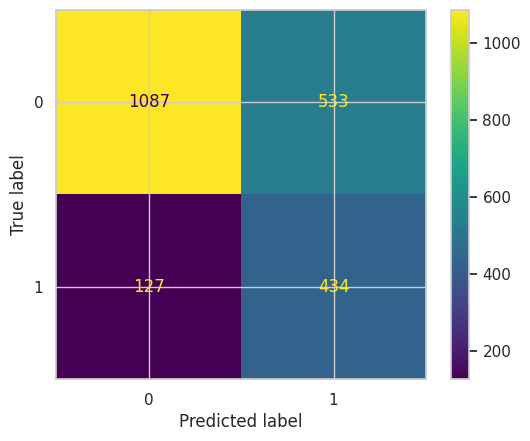

In [23]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

###📌 Conclusiones

Por la salida de los datos, se tomo la desición de entrenar un modelo mediante DecisionTreeClassifier y RandomForestRegressor. Por los resultados de los modelos, se concluyo el uso del Árbol de desición con balanceo de clases (undersampling), el cual dio un Recall de 77%.

La variable más influyente para este analisis fue el tiempo que permanencia de los clientes en la compañia, siendo inversamente proporcional al Churn.

###Recomendaciones

Como principal recomendación se propone, incentivar a los clientes nuevos a permanecer en la compañia, esto se puede lograr con inicitivas que ayuden a mantener y evitar el abandono.

- Incentivos para firmar un contrato de un año mediante promociones, productos y descuentos.
- Proponer diferentes metodos de pago para los primeros meses.